In [2]:
import pandas as pd
import sklearn
from sklearn.utils import resample
pd.set_option('display.max_colwidth', None)
import csv

## Emotion

In [3]:
df_em = pd.read_pickle("D:/En-for-MOTION/data/emotion/emotion_dataset.pkl")
df_em=df_em.rename({'emotions':'emotion'},axis=1)
df_em

,text,emotion
27383,i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i really do feel proud of myself for actually keeping up with my new years resolution of monthly and weekly goals,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to other peoples feelings and tend to be more compassionate,love
...,...,...
566,that was what i felt when i was finally accepted in the bulgarian conservatorie after i had applied a couple of years,joy
36236,i take every day as it comes i m just focussing on eating better at the moment i m not aiming for unrealistic targets or setting myself deadlines because then i feel pressured i m just improving my diet,fear
76229,i just suddenly feel that everything was fake,sadness
131640,im feeling more eager than ever to claw back what went pear shaped last week and get back on track,joy


In [4]:
df_train = pd.read_csv("D:/En-for-MOTION/data/emotion/first_train.txt",sep=';')
df_train

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplace i will know that it is still on the property,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag and i said to anna that i feel like i have been beaten up,sadness
15996,i am now turning and i feel pathetic that i am still waiting tables and subbing with a teaching degree,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and im glad that t,anger


In [5]:
df_val = pd.read_csv('D:/En-for-MOTION/data/emotion/first_val.txt',sep=';')
df_val

,text,emotion
0,im feeling rather rotten so im not very ambitious right now,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i don t ever want her to feel like i m ashamed with her,sadness
3,i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived,joy
4,i was feeling a little vain when i did this one,sadness
...,...,...
1995,i just keep feeling like someone is being unkind to me and doing me wrong and then all i can think of doing is to get back at them and the people they are close to,anger
1996,im feeling a little cranky negative after this doctors appointment,anger
1997,i feel that i am useful to my people and that gives me a great feeling of achievement,joy
1998,im feeling more comfortable with derby i feel as though i can start to step out my shell,joy


In [6]:
df_full = df_em.append(df_train).append(df_val).drop_duplicates().reset_index(drop=True).dropna()
df_full

C:\Users\natal\AppData\Local\Temp\ipykernel_11300\1861946131.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_full = df_em.append(df_train).append(df_val).drop_duplicates().reset_index(drop=True).dropna()
C:\Users\natal\AppData\Local\Temp\ipykernel_11300\1861946131.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_full = df_em.append(df_train).append(df_val).drop_duplicates().reset_index(drop=True).dropna()


,text,emotion
0,i feel awful about it too because it s my job to get him in a position to succeed and it just didn t happen here,sadness
1,im alone i feel awful,sadness
2,ive probably mentioned this before but i really do feel proud of myself for actually keeping up with my new years resolution of monthly and weekly goals,joy
3,i was feeling a little low few days back,sadness
4,i beleive that i am much more sensitive to other peoples feelings and tend to be more compassionate,love
...,...,...
416118,that was what i felt when i was finally accepted in the bulgarian conservatorie after i had applied a couple of years,joy
416119,i take every day as it comes i m just focussing on eating better at the moment i m not aiming for unrealistic targets or setting myself deadlines because then i feel pressured i m just improving my diet,fear
416120,i just suddenly feel that everything was fake,sadness
416121,im feeling more eager than ever to claw back what went pear shaped last week and get back on track,joy


<AxesSubplot:>

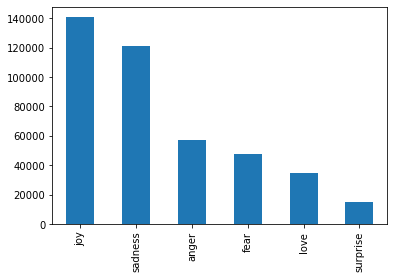

In [7]:
df_full['emotion'].value_counts().plot(kind='bar')

In [9]:
downsample_joy = resample(df_full[df_full['emotion']=='joy'],
             replace=True,
             n_samples=10000,
             random_state=42)
downsample_sadness = resample(df_full[df_full['emotion']=='sadness'],
             replace=True,
             n_samples=10000,
             random_state=42)
upsample_anger= resample(df_full[df_full['emotion']=='anger'],
             replace=True,
             n_samples=10000,
             random_state=42)
upsample_fear= resample(df_full[df_full['emotion']=='fear'],
             replace=True,
             n_samples=10000,
             random_state=42)
upsample_love= resample(df_full[df_full['emotion']=='love'],
             replace=True,
             n_samples=10000,
             random_state=42)
upsample_surprise= resample(df_full[df_full['emotion']=='surprise'],
             replace=True,
             n_samples=10000,
             random_state=42)

C:\Users\natal\AppData\Local\Temp\ipykernel_11300\1442670965.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced_emotion=downsample_joy.append(downsample_sadness).append(upsample_anger).append(upsample_fear).append(upsample_love).append(upsample_surprise).reset_index(drop=True).sample(frac=1).reset_index(drop=True)
C:\Users\natal\AppData\Local\Temp\ipykernel_11300\1442670965.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced_emotion=downsample_joy.append(downsample_sadness).append(upsample_anger).append(upsample_fear).append(upsample_love).append(upsample_surprise).reset_index(drop=True).sample(frac=1).reset_index(drop=True)
C:\Users\natal\AppData\Local\Temp\ipykernel_11300\1442670965.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

<AxesSubplot:>

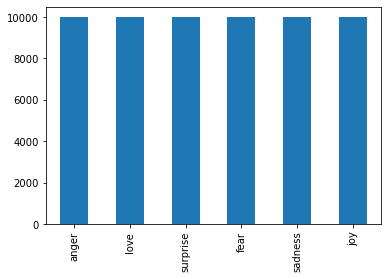

In [10]:
df_balanced_emotion=downsample_joy.append(downsample_sadness).append(upsample_anger).append(upsample_fear).append(upsample_love).append(upsample_surprise).reset_index(drop=True).sample(frac=1).reset_index(drop=True)
df_balanced_emotion['emotion'].value_counts().plot(kind='bar')

In [11]:
train_balanced_emotion=df_balanced_emotion.sample(frac=0.8,random_state=42).reset_index(drop=True)
test_balanced_emotion=df_balanced_emotion.drop(train_balanced_emotion.index)

In [12]:
print(len(df_balanced_emotion))
print(len(train_balanced_emotion))
print(len(test_balanced_emotion))

60000
48000
12000


## Saving train/test to txt

model 1 - first train/test

model 2 - each label (6) 10000 samples

model 3 - joy 110000, sad 80000, anger 40000, love 40000, fear 20000, surprise 10000

In [85]:
train_balanced_emotion.to_csv('D:/En-for-MOTION/data/final_datasets/model2/train.txt', sep=';', index=False)

In [86]:
test_balanced_emotion.to_csv('D:/En-for-MOTION/data/final_datasets/model2/test.txt', sep=';', index=False)

## Discourse

In [54]:
coarse_disc_df = pd.read_json('D:/En-for-MOTION/data/discourse/coarse_discourse_dataset.json/coarse_discourse_dataset.json',lines=True)

In [2]:
discourse_relations=['elaboration', 'contrast', 'evaluation', 'temporal','enablement',
       'attribution','condition','joint', 'background', 'topic-comment','explanation',
       'summary','same-unit', 'textual']
#emotions=['joy']

In [5]:
fairy_tales_df = pd.read_csv('D:/En-for-MOTION/data/all_fairy_tales_df.csv').drop_duplicates().dropna()
fairy_tales_df = fairy_tales_df.rename({'Sentences of 106_the_poor_millers_boy_and_the_cat': 'text','RST Relation 106_the_poor_millers_boy_and_the_cat': 'discourse_relation','One Label': 'emotion'},axis=1)
fairy_tales_df['discourse_relation'] = fairy_tales_df['discourse_relation'].apply(lambda x: x.lower())
fairy_tales_df['emotion'] = fairy_tales_df['emotion'].apply(lambda x: x.lower())

fairy_tales_discourse = fairy_tales_df.drop(columns=['Nuclearity','emotion'],axis=1)
fairy_tales_discourse = fairy_tales_discourse[fairy_tales_discourse['discourse_relation'].isin(discourse_relations)]

<AxesSubplot:>

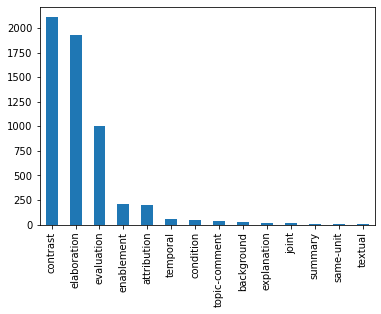

In [58]:
fairy_tales_discourse.discourse_relation.value_counts().plot(kind='bar')

In [59]:
dialogue_discourse=pd.read_csv('D:/En-for-MOTION/data/discourse/situated_only_tables/outgoing_base_situ.csv', usecols=['text','relation_type']).drop_duplicates().dropna()
dialogue_discourse=dialogue_discourse.rename({'relation_type':'discourse_relation'},axis=1)
dialogue_discourse['discourse_relation']=dialogue_discourse['discourse_relation'].apply(lambda x: x.lower())

<AxesSubplot:>

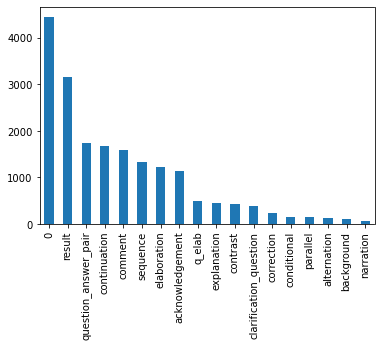

In [60]:
dialogue_discourse['discourse_relation'].value_counts().plot(kind='bar')

In [61]:
# combining both dfs
discourse_df = fairy_tales_discourse.append(dialogue_discourse)
discourse_df = discourse_df.drop(discourse_df[discourse_df['text']=='0'].index)
discourse_df = discourse_df.drop(discourse_df[discourse_df['discourse_relation']=='0'].index)

C:\Users\natal\AppData\Local\Temp\ipykernel_11140\185625217.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  discourse_df = fairy_tales_discourse.append(dialogue_discourse)


<AxesSubplot:>

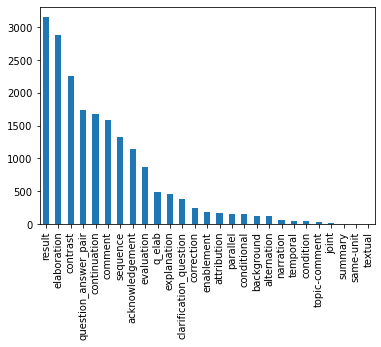

In [62]:
discourse_df.discourse_relation.value_counts().plot(kind='bar')

In [63]:
discourse_df['discourse_relation'] = discourse_df['discourse_relation'].replace(['q_elab'],'elaboration')
#discourse_df['discourse_relation'] = discourse_df['discourse_relation'].replace(['clarification_question'],'explanation')
discourse_df['discourse_relation'] = discourse_df['discourse_relation'].replace(['alternation'],'correction')
discourse_df['discourse_relation'] = discourse_df['discourse_relation'].replace(['condition','temporal'],'conditional')
discourse_df['discourse_relation'] = discourse_df['discourse_relation'].replace(['topic-comment'],'comment')
discourse_df['discourse_relation'] = discourse_df['discourse_relation'].replace(['narration','textual','same-unit','parallel','summary','joint'],'background')
discourse_df['discourse_relation'] = discourse_df['discourse_relation'].replace(['clarification_question'],'clarification')
discourse_df['discourse_relation'] = discourse_df['discourse_relation'].replace(['question_answer_pair'],'qa')
discourse_df['discourse_relation'] = discourse_df['discourse_relation'].replace(['correction'],'evaluation')
discourse_df = discourse_df.drop(discourse_df[discourse_df['discourse_relation']=='qa'].index)

<AxesSubplot:>

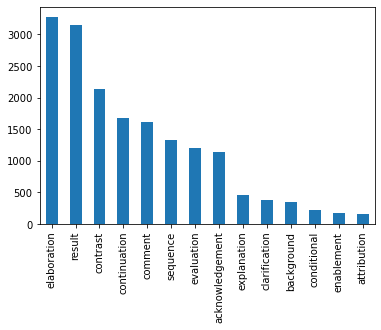

In [64]:
discourse_df.discourse_relation.value_counts().plot(kind='bar')

In [65]:
downsample_elab = resample(discourse_df[discourse_df['discourse_relation']=='elaboration'],
             replace=True,
             n_samples=2000,
             random_state=42)
downsample_res = resample(discourse_df[discourse_df['discourse_relation']=='result'],
             replace=True,
             n_samples=2000,
             random_state=42)
downsample_con = resample(discourse_df[discourse_df['discourse_relation']=='contrast'],
             replace=True,
             n_samples=2000,
             random_state=42)
upasample_continuation = resample(discourse_df[discourse_df['discourse_relation']=='continuation'],
             replace=True,
             n_samples=2000,
             random_state=42)
upasample_comment = resample(discourse_df[discourse_df['discourse_relation']=='comment'],
             replace=True,
             n_samples=2000,
             random_state=42)
upasample_seq = resample(discourse_df[discourse_df['discourse_relation']=='sequence'],
             replace=True,
             n_samples=2000,
             random_state=42)
upasample_eval = resample(discourse_df[discourse_df['discourse_relation']=='evaluation'],
             replace=True,
             n_samples=2000,
             random_state=42)
upasample_ackn = resample(discourse_df[discourse_df['discourse_relation']=='acknowledgement'],
             replace=True,
             n_samples=2000,
             random_state=42)
upasample_expl = resample(discourse_df[discourse_df['discourse_relation']=='explanation'],
             replace=True,
             n_samples=2000,
             random_state=42)
upasample_clar = resample(discourse_df[discourse_df['discourse_relation']=='clarification'],
             replace=True,
             n_samples=2000,
             random_state=42)
upasample_back = resample(discourse_df[discourse_df['discourse_relation']=='background'],
             replace=True,
             n_samples=2000,
             random_state=42)
upasample_cond = resample(discourse_df[discourse_df['discourse_relation']=='conditional'],
             replace=True,
             n_samples=2000,
             random_state=42)
upasample_enabl = resample(discourse_df[discourse_df['discourse_relation']=='enablement'],
             replace=True,
             n_samples=2000,
             random_state=42)
upasample_attr = resample(discourse_df[discourse_df['discourse_relation']=='attribution'],
             replace=True,
             n_samples=2000,
             random_state=42)

C:\Users\natal\AppData\Local\Temp\ipykernel_11140\3455317332.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced_discourse=downsample_elab.append(downsample_res).append(downsample_con).append(upasample_ackn).append(upasample_attr).append(upasample_back).append(upasample_clar).append(upasample_comment).append(upasample_cond).append(upasample_continuation).append(upasample_enabl).append(upasample_eval).append(upasample_expl).append(upasample_seq).reset_index(drop=True)
C:\Users\natal\AppData\Local\Temp\ipykernel_11140\3455317332.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_balanced_discourse=downsample_elab.append(downsample_res).append(downsample_con).append(upasample_ackn).append(upasample_attr).append(upasample_back).append(upasample_clar).append(upasample_comment).append(upasample_cond).

<AxesSubplot:>

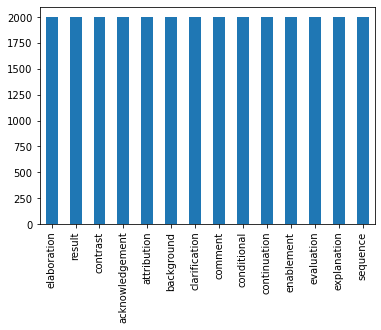

In [74]:
df_balanced_discourse=downsample_elab.append(downsample_res).append(downsample_con).append(upasample_ackn).append(upasample_attr).append(upasample_back).append(upasample_clar).append(upasample_comment).append(upasample_cond).append(upasample_continuation).append(upasample_enabl).append(upasample_eval).append(upasample_expl).append(upasample_seq).reset_index(drop=True)
df_balanced_discourse['discourse_relation'].value_counts().plot(kind='bar')

## Saving final datasets

In [67]:
df_balanced_discourse.to_csv('D:/En-for-MOTION/data/final_datasets/discourse_balanced.csv',index=False)
df_balanced_emotion.to_csv('D:/En-for-MOTION/data/final_datasets/emotion_balanced.csv',index=False)

In [1]:
df_balanced_discourse.sample(5)

NameError: name 'df_balanced_discourse' is not defined

### Fairy tales data with relations and emotion labels